In [35]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [180]:
Bike = pd.read_csv("C:\\Users\\nadaf\\OneDrive\\Desktop\\day\\day.csv")
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [181]:
Bike.shape

(730, 16)

In [182]:
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [183]:
Bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [184]:
Bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Info:
1. 730 rows and 16 columns.
2. Only one coumn is object type and all the others are either integer or float type.
3. There are no missing values.
4. Target variable is "cnt".


# Data Quality Check

## Checking NULL/MISSING Value

In [185]:
## Missing values in each column
round(100*(Bike.isnull().sum()/len(Bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [186]:
## Null count percentage in each row
round((Bike.isnull().sum(axis=1)/len(Bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

#### No missing / Null values found in either row or in columns.



# Exploratory Data Analysis
## Data Visualisation

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
### Dropping the Columns
## instant is and index we can drop it
Bike.drop(['instant'],axis=1,inplace=True)
Bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [189]:
### As we can see dteday, yr and mnth are having same data so we can drop dteday
Bike.drop(['dteday'],axis=1,inplace=True)
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [190]:
## we know that 'cnt' is are target variable and casual+registered is equal to cnt so we drop casual and registered.
Bike.drop(['casual','registered'],axis=1,inplace=True)
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [191]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [192]:
Bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [193]:
Bike['weathersit'].replace({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',4:'Worse/HeavyRain'},inplace=True)
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600


In [194]:
Bike['weekday'].replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600


In [195]:
#changing datatypes of numerical columns to appropriate types

Bike[['temp','atemp','hum','windspeed','cnt']]=Bike[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600


In [196]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB




## Numerical variable


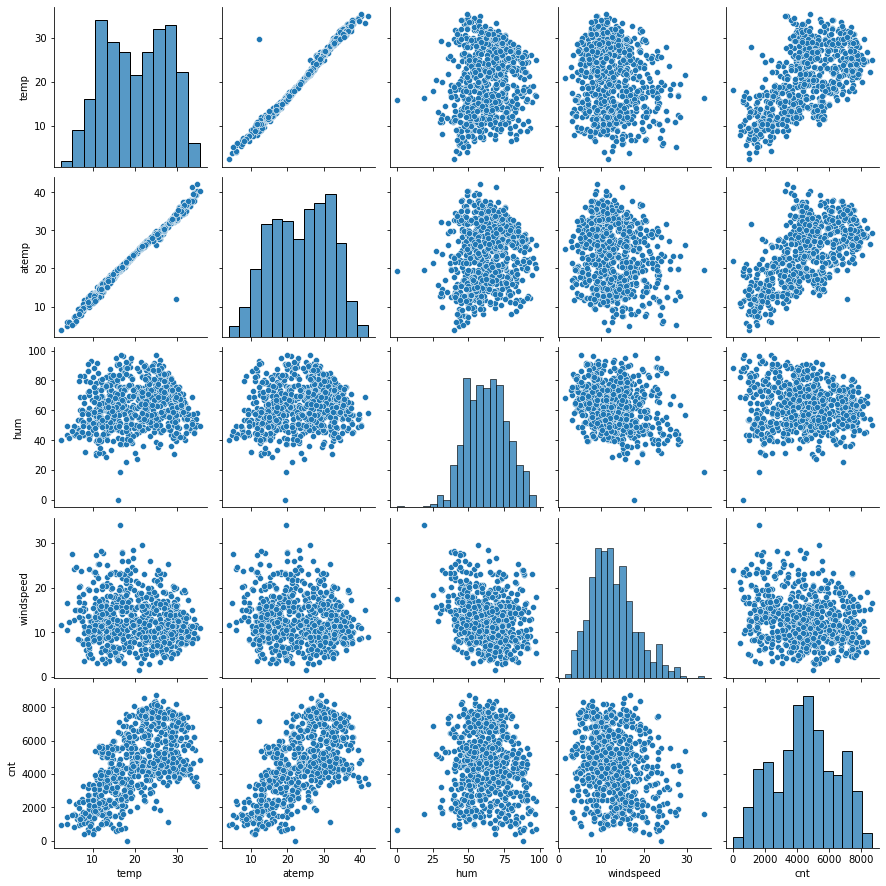

In [197]:
## Using pairplot
sns.pairplot(Bike, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

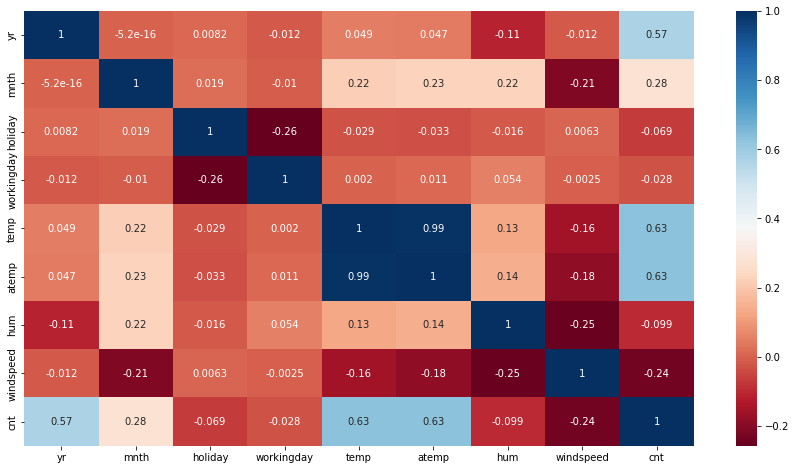

In [198]:
## Now we can say that from above there is relationship between temp and atemp.
## Correlation:-
plt.figure(figsize = (15, 8))
sns.heatmap(Bike.corr(), annot = True, cmap="RdBu")
plt.show()

# Categorical Variable

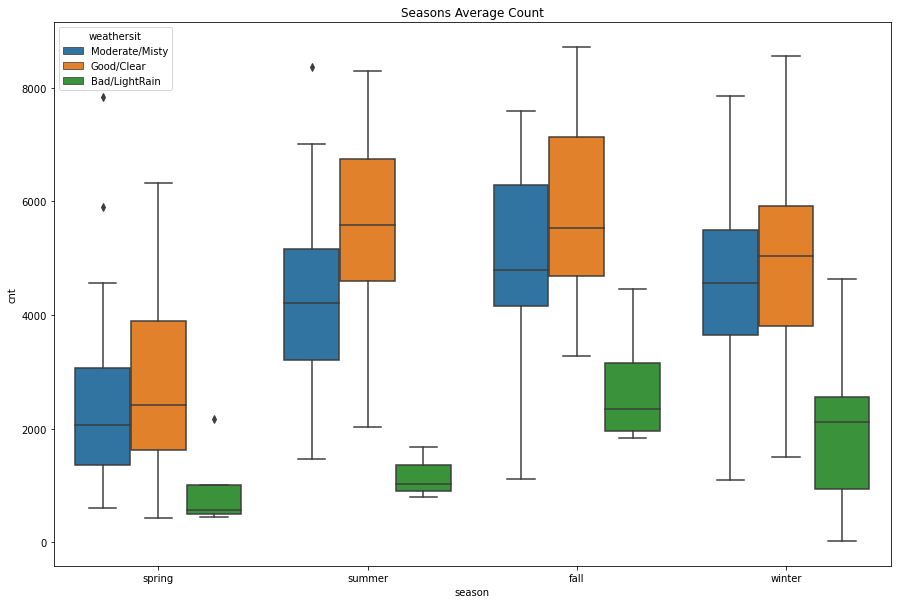

In [199]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'season', y = 'cnt',hue='weathersit', data = Bike)
plt.title('Seasons Average Count')
plt.show()


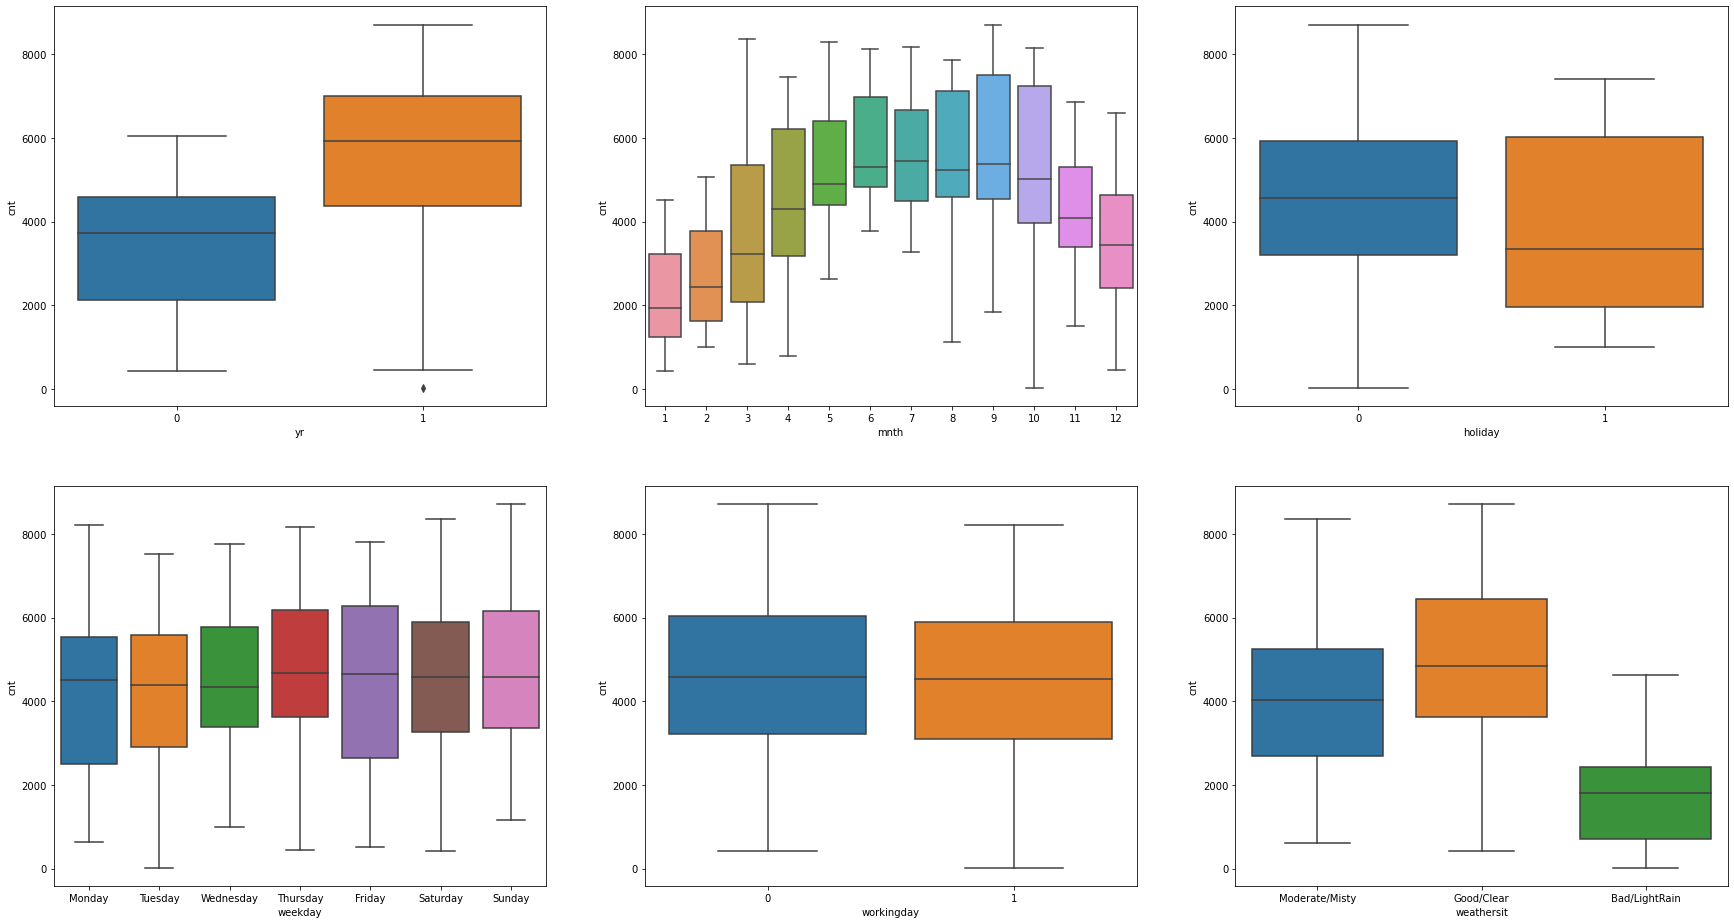

In [200]:
plt.figure(figsize=(30,25))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike)
plt.show()

# Dummy Variable:

In [201]:
cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for i in cat:
    Bike[i] = Bike[i].astype('category')

In [202]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [203]:
dummy = pd.get_dummies(Bike[cat], drop_first=True)
dummy.head()

,season_spring,season_summer,season_winter,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_Good/Clear,weathersit_Moderate/Misty
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [204]:
# Combining both the dataframe, bike_1 and of dummy variables
Bike_1 = pd.concat([Bike,dummy], axis=1)
Bike_1.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_Good/Clear,weathersit_Moderate/Misty
0,spring,0,1,0,Monday,1,Moderate/Misty,14.110847,18.18125,80.5833,...,0,1,0,0,0,0,0,1,0,1
1,spring,0,1,0,Tuesday,1,Moderate/Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,1,0,1
2,spring,0,1,0,Wednesday,1,Good/Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,1,1,0
3,spring,0,1,0,Thursday,1,Good/Clear,8.200000,10.60610,59.0435,...,0,0,0,0,1,0,0,1,1,0
4,spring,0,1,0,Friday,1,Good/Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,1,0


In [205]:
# Dropping columbs from cat :
Bike_1.drop(cat, axis=1, inplace = True)
Bike_1.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_2,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_Good/Clear,weathersit_Moderate/Misty
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [206]:
Bike_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   temp                       730 non-null    float64
 1   atemp                      730 non-null    float64
 2   hum                        730 non-null    float64
 3   windspeed                  730 non-null    float64
 4   cnt                        730 non-null    int64  
 5   season_spring              730 non-null    uint8  
 6   season_summer              730 non-null    uint8  
 7   season_winter              730 non-null    uint8  
 8   yr_1                       730 non-null    uint8  
 9   mnth_2                     730 non-null    uint8  
 10  mnth_3                     730 non-null    uint8  
 11  mnth_4                     730 non-null    uint8  
 12  mnth_5                     730 non-null    uint8  
 13  mnth_6                     730 non-null    uint8  

##### As we can see there are 30 columns and now we can start Building Model.

# Train - Test Split :

In [207]:
# Import statsmodel and sklearn libraries for Linear regression model building
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [208]:
# Split the date into train and test :
Bike_1_train, Bike_1_test = train_test_split(Bike_1, train_size=0.70, random_state=100)

In [209]:
print(Bike_1_train.shape)
print(Bike_1_test.shape)

(510, 30)
(220, 30)


### Rescaling using MinMax Scaler

In [210]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Bike_1.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'holiday_1', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday_1', 'weathersit_Good/Clear',
       'weathersit_Moderate/Misty'],
      dtype='object')

In [211]:
num_vars=['temp','atemp','hum','windspeed','cnt']
Bike_1_train[num_vars] = scaler.fit_transform(Bike_1_train[num_vars])

In [212]:
Bike_1_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_2,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_Good/Clear,weathersit_Moderate/Misty
576,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [213]:
Bike_1_train.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_2,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_Good/Clear,weathersit_Moderate/Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,0.066667,...,0.025490,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.711765,0.625490,0.345098
std,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,0.249689,...,0.157763,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.453386,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building Linear Model :


In [214]:
# Dividing set into X_train and y_train sets:

y_train = Bike_1_train.pop('cnt')
X_train = Bike_1_train

In [215]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


In [216]:
# Importing RFE library for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [217]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)            
rfe = rfe.fit(X_train, y_train)

In [218]:
list(zip(X_train, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 4),
 ('mnth_5', False, 2),
 ('mnth_6', False, 3),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('holiday_1', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', False, 7),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 16),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 15),
 ('workingday_1', False, 6),
 ('weathersit_Good/Clear', True, 1),
 ('weathersit_Moderate/Misty', True, 1)]

In [219]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_3', 'mnth_8', 'mnth_9', 'mnth_10',
       'holiday_1', 'weathersit_Good/Clear', 'weathersit_Moderate/Misty'],
      dtype='object')

In [220]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_11',
       'mnth_12', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday_1'],
      dtype='object')

In [221]:
# New train dataframe with RFE feature
X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_3,mnth_8,mnth_9,mnth_10,holiday_1,weathersit_Good/Clear,weathersit_Moderate/Misty
576,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0,1,0
426,0.442393,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,1,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,1
111,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,1


# Model_1:

In [222]:
## Import statsmodels to add const/intercepts.
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          2.46e-189
Time:                        17:33:34   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0234      0.047      0.498      0.619      -0.069       0.116
temp                          0.4965      0.034     14.604      0.000       0.430       0.563
hum                          -0.1719      0.038     -4.562      0.000      -0.246      -0.098
windspeed                    -0.1858      0.026     -7.234      0.000      -0.236      -0.135
season_spring                -0.0361      0.023     -1.593      0.112      -0.081       0.008
season_summer                 0.0864      0.016      5.282      0.000       0.054       0.119
season_winter                 0.1140      0.020      5.685      0.000       0.075       0.153
yr_1                          0.2298      0.008     28.366      0.000       0.214       0.246
mnth_3                        0.0279      0.014      1.931      0.054      -0.000       0.056
mnth_8                        0.0505      0.018      2.883      0.004       0.016       0.085
mnth_9                        0.1202      0.017      6.946      0.000       0.086       0.154
mnth_10                       0.0393      0.018      2.231      0.026       0.005       0.074
holiday_1                    -0.0900      0.026     -3.528      0.000      -0.140      -0.040
weathersit_Good/Clear         0.2449      0.026      9.259      0.000       0.193       0.297
weathersit_Moderate/Misty     0.1905      0.025      7.591      0.000       0.141       0.240
==============================================================================
Omnibus:                       70.936   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.767
Skew:                          -0.736   Prob(JB):                     1.66e-36
Kurtosis:                       5.363   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
# Import libraries to check the VIF values:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,25.42
0,temp,21.18
12,weathersit_Good/Clear,15.21
13,weathersit_Moderate/Misty,9.28
3,season_spring,6.55
5,season_winter,5.44
2,windspeed,4.63
4,season_summer,3.82
6,yr_1,2.10
8,mnth_8,1.84


# Model_2:

##### Removing features as we can see the p- value<0.05

In [224]:
X_train_rfe2 = X_train_rfe.drop('hum', axis = 1)

X_train_lm2 = sm.add_constant(X_train_rfe2)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          4.39e-186
Time:                        17:33:37   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     496   BIC:                            -917.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.1058      0.038     -2.757      0.006      -0.181      -0.030
temp                          0.4599      0.034     13.651      0.000       0.394       0.526
windspeed                    -0.1519      0.025     -6.060      0.000      -0.201      -0.103
season_spring                -0.0510      0.023     -2.230      0.026      -0.096      -0.006
season_summer                 0.0754      0.016      4.571      0.000       0.043       0.108
season_winter                 0.0958      0.020      4.778      0.000       0.056       0.135
yr_1                          0.2340      0.008     28.506      0.000       0.218       0.250
mnth_3                        0.0312      0.015      2.115      0.035       0.002       0.060
mnth_8                        0.0449      0.018      2.522      0.012       0.010       0.080
mnth_9                        0.1101      0.018      6.292      0.000       0.076       0.144
mnth_10                       0.0365      0.018      2.033      0.043       0.001       0.072
holiday_1                    -0.0906      0.026     -3.480      0.001      -0.142      -0.039
weathersit_Good/Clear         0.2919      0.025     11.746      0.000       0.243       0.341
weathersit_Moderate/Misty     0.2103      0.025      8.341      0.000       0.161       0.260
==============================================================================
Omnibus:                       70.952   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.536
Skew:                          -0.733   Prob(JB):                     6.87e-37
Kurtosis:                       5.385   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
# Checking value of VIF for feature variable: 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,weathersit_Good/Clear,15.20
0,temp,12.77
12,weathersit_Moderate/Misty,8.66
2,season_spring,4.65
1,windspeed,4.61
4,season_winter,3.70
3,season_summer,3.13
5,yr_1,2.08
7,mnth_8,1.78
9,mnth_10,1.64


# Model_3:
###### Removing feature - 'Weather_Moderate/Misty' as VIF values are high as all the p-values < 0.05.Temp and Weather_Good/Clear has value higher VIF but from  EDA we got data that they both play a major role in the demand of bikes. Thus we are using as of now.

In [226]:
X_train_rfe3 = X_train_rfe2.drop('weathersit_Moderate/Misty', axis = 1)

X_train_lm3 = sm.add_constant(X_train_rfe3)

lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     182.0
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          3.75e-173
Time:                        17:33:40   Log-Likelihood:                 468.71
No. Observations:                 510   AIC:                            -911.4
Df Residuals:                     497   BIC:                            -856.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0835      0.033      2.531      0.012       0.019       0.148
temp                      0.4679      0.036     13.025      0.000       0.397       0.539
windspeed                -0.1734      0.027     -6.519      0.000      -0.226      -0.121
season_spring            -0.0379      0.024     -1.555      0.121      -0.086       0.010
season_summer             0.0856      0.018      4.875      0.000       0.051       0.120
season_winter             0.1009      0.021      4.719      0.000       0.059       0.143
yr_1                      0.2373      0.009     27.132      0.000       0.220       0.254
mnth_3                    0.0255      0.016      1.621      0.106      -0.005       0.056
mnth_8                    0.0532      0.019      2.807      0.005       0.016       0.090
mnth_9                    0.1092      0.019      5.852      0.000       0.073       0.146
mnth_10                   0.0208      0.019      1.090      0.276      -0.017       0.058
holiday_1                -0.0859      0.028     -3.094      0.002      -0.140      -0.031
weathersit_Good/Clear     0.0973      0.009     10.656      0.000       0.079       0.115
==============================================================================
Omnibus:                       97.623   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.333
Skew:                          -0.897   Prob(JB):                     4.49e-65
Kurtosis:                       6.276   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
# Checking VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.19
1,windspeed,4.57
11,weathersit_Good/Clear,2.73
3,season_summer,2.33
2,season_spring,2.32
4,season_winter,2.23
5,yr_1,2.07
7,mnth_8,1.70
9,mnth_10,1.58
8,mnth_9,1.38


# Model_4:
###### Removing feature - 'mnth_10' coz of high p-values(0.276).

In [228]:
X_train_rfe4 = X_train_rfe3.drop('mnth_10', axis = 1)

X_train_lm4 = sm.add_constant(X_train_rfe4)

lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     198.4
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          4.69e-174
Time:                        17:33:42   Log-Likelihood:                 468.10
No. Observations:                 510   AIC:                            -912.2
Df Residuals:                     498   BIC:                            -861.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0775      0.033      2.382      0.018       0.014       0.141
temp                      0.4769      0.035     13.637      0.000       0.408       0.546
windspeed                -0.1720      0.027     -6.473      0.000      -0.224      -0.120
season_spring            -0.0343      0.024     -1.421      0.156      -0.082       0.013
season_summer             0.0865      0.018      4.934      0.000       0.052       0.121
season_winter             0.1104      0.020      5.652      0.000       0.072       0.149
yr_1                      0.2369      0.009     27.105      0.000       0.220       0.254
mnth_3                    0.0252      0.016      1.606      0.109      -0.006       0.056
mnth_8                    0.0523      0.019      2.763      0.006       0.015       0.090
mnth_9                    0.1072      0.019      5.771      0.000       0.071       0.144
holiday_1                -0.0868      0.028     -3.127      0.002      -0.141      -0.032
weathersit_Good/Clear     0.0965      0.009     10.602      0.000       0.079       0.114
==============================================================================
Omnibus:                       90.401   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.616
Skew:                          -0.847   Prob(JB):                     2.56e-57
Kurtosis:                       6.065   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
# Checking VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.01
1,windspeed,4.57
10,weathersit_Good/Clear,2.70
2,season_spring,2.32
3,season_summer,2.31
5,yr_1,2.07
4,season_winter,1.77
7,mnth_8,1.69
8,mnth_9,1.35
6,mnth_3,1.29


# Model_5:
###### Removing feature - 'mnth_3' has high p-values(0.109).

In [230]:
X_train_rfe5 = X_train_rfe4.drop('mnth_3', axis = 1)

X_train_lm5 = sm.add_constant(X_train_rfe5)

lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          1.12e-174
Time:                        17:33:43   Log-Likelihood:                 466.78
No. Observations:                 510   AIC:                            -911.6
Df Residuals:                     499   BIC:                            -865.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0749      0.033      2.302      0.022       0.011       0.139
temp                      0.4792      0.035     13.693      0.000       0.410       0.548
windspeed                -0.1694      0.027     -6.376      0.000      -0.222      -0.117
season_spring            -0.0268      0.024     -1.128      0.260      -0.073       0.020
season_summer             0.0904      0.017      5.200      0.000       0.056       0.125
season_winter             0.1112      0.020      5.690      0.000       0.073       0.150
yr_1                      0.2369      0.009     27.061      0.000       0.220       0.254
mnth_8                    0.0524      0.019      2.760      0.006       0.015       0.090
mnth_9                    0.1075      0.019      5.776      0.000       0.071       0.144
holiday_1                -0.0897      0.028     -3.234      0.001      -0.144      -0.035
weathersit_Good/Clear     0.0965      0.009     10.585      0.000       0.079       0.114
==============================================================================
Omnibus:                       89.614   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.376
Skew:                          -0.829   Prob(JB):                     8.71e-59
Kurtosis:                       6.136   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.01
1,windspeed,4.56
9,weathersit_Good/Clear,2.70
3,season_summer,2.26
2,season_spring,2.14
5,yr_1,2.07
4,season_winter,1.77
6,mnth_8,1.69
7,mnth_9,1.35
8,holiday_1,1.04


# Model_6:
###### Removing feature - 'mnth_8' has high p-values(0.006).

In [232]:
X_train_rfe6 = X_train_rfe5.drop('mnth_8', axis = 1)

X_train_lm6 = sm.add_constant(X_train_rfe6)

lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     237.5
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          3.04e-174
Time:                        17:33:45   Log-Likelihood:                 462.92
No. Observations:                 510   AIC:                            -905.8
Df Residuals:                     500   BIC:                            -863.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1009      0.031      3.218      0.001       0.039       0.162
temp                      0.4782      0.035     13.576      0.000       0.409       0.547
windspeed                -0.1711      0.027     -6.398      0.000      -0.224      -0.119
season_spring            -0.0509      0.022     -2.292      0.022      -0.094      -0.007
season_summer             0.0665      0.015      4.382      0.000       0.037       0.096
season_winter             0.0884      0.018      4.958      0.000       0.053       0.123
yr_1                      0.2378      0.009     27.008      0.000       0.221       0.255
mnth_9                    0.0884      0.017      5.083      0.000       0.054       0.123
holiday_1                -0.0906      0.028     -3.245      0.001      -0.145      -0.036
weathersit_Good/Clear     0.0944      0.009     10.318      0.000       0.076       0.112
==============================================================================
Omnibus:                       94.652   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.230
Skew:                          -0.883   Prob(JB):                     1.04e-60
Kurtosis:                       6.144   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.66
1,windspeed,4.54
8,weathersit_Good/Clear,2.70
5,yr_1,2.06
2,season_spring,2.02
3,season_summer,1.85
4,season_winter,1.57
6,mnth_9,1.22
7,holiday_1,1.04


# Model_7:
###### Removing feature - 'season_spring' coz of high negative collinearity with temp variable.

In [234]:
X_train_rfe7 = X_train_rfe6.drop('season_spring', axis = 1) 

X_train_lm7 = sm.add_constant(X_train_rfe7)

lr7 = sm.OLS(y_train, X_train_lm7).fit()

lr7.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     264.2
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          2.45e-174
Time:                        17:33:48   Log-Likelihood:                 460.26
No. Observations:                 510   AIC:                            -902.5
Df Residuals:                     501   BIC:                            -864.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0417      0.018      2.337      0.020       0.007       0.077
temp                      0.5428      0.021     25.540      0.000       0.501       0.585
windspeed                -0.1756      0.027     -6.559      0.000      -0.228      -0.123
season_summer             0.0903      0.011      8.152      0.000       0.069       0.112
season_winter             0.1205      0.011     10.863      0.000       0.099       0.142
yr_1                      0.2366      0.009     26.806      0.000       0.219       0.254
mnth_9                    0.0978      0.017      5.761      0.000       0.064       0.131
holiday_1                -0.0928      0.028     -3.312      0.001      -0.148      -0.038
weathersit_Good/Clear     0.0939      0.009     10.226      0.000       0.076       0.112
==============================================================================
Omnibus:                       88.063   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.486
Skew:                          -0.853   Prob(JB):                     1.21e-51
Kurtosis:                       5.851   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
# Check VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.35
1,windspeed,3.08
7,weathersit_Good/Clear,2.55
4,yr_1,2.00
2,season_summer,1.55
3,season_winter,1.33
5,mnth_9,1.20
6,holiday_1,1.04


###### Now the model looks good and significant as the difference between predictor and p-values is low.

# Final Model Interpretation:
- Hypothesis Testing
    - Hypothesis testing states that:
        - H0:B1=B2=...=Bn=0
        - H1: at least one Bi!=0

  Model_7 coefficient values 
  
   - const = 0.0417
   - temp = 0.5428
   - windspeed = -0.1756
   - season_summer = 0.0903
   - Season_winter = 0.1205
   - yr_1 = 0.2366
   - mnth_9 = 0.0978
   - holiday_1 = -0.0928
   - weathersit_Good/Clear = 0.0939
 
 
      
     

 <b> Finding:- Model_7 coefficients are not equal to zero it is  ALTERNATE HYPOTHESIS i.e WE REJECT THE NULL HYPOTHESIS.
    
  <b> F Statistics:- F-Statistics is used to test the significance of regression coefficients and model. Higher the value                        of F-statistics greater the model is:
   - F-statistic: 264.2
   - Prob (F-statistic): 2.45e-174
The F-Statistics value of 264.2 i.e greater than and the p-value of '~0.0000' states that the overall model is significant
 

# Equation of Best Fitted Line based on Model_7:
 <b> cnt = 0.0417 $+$ (temp$*$0.5428) $-$ (windspeed$*$0.1756)
       $+$ (season_summer$*$0.0903) $+$ (season_winter$*$0.1205) $+$ (yr_1$*$0.2366)
       $+$ (mnth_9$*$0.0978) $-$ (holiday_1$*$0.0928) $+$ (weathersit_Good/Clear$*$0.0939)


# Interpretation of Coefficients:
- <b>const : The Constant value of ‘0.0417’ i.e in the absence of all other predictor variables, Bike rental still increased by 0.0417.

    
- <b>temp The value of temp variable 0.5428 that means increases the bike hire numbers by 0.5428 units.

    
- <b>windspeed A coefficient value of ‘-0.1756’i.e negative unite and valueso it decreases bike demand by 0.1756 units.

    
- <b>season_summer: A coefficient value of ‘0.0903’ indicate a unit increase in Season_summer variable, increases bike demand by 0.0903 units.

    
- <b>season_winter: A coefficient value of ‘0.1205’ indicate a unit increase in Season_winter variable, increases bike demand by 0.1205 units.

    
- <b>yr_1: A coefficient value of ‘0.2366’ indicate a unit increase in Year_2019 variable, increases the bike hire by 0.2366 units.

    
- <b>mnth_9: A coefficient value of ‘0.0978’ indicate a unit increase in Month_Sept variable, increases the bike demand by 0.0978 units.

    
- <b>holiday_1: A coefficient value of ‘-0.0928’ indicate a unit decrease in holiday_Yes variable, decreases bike demand by 0.0928 units.

    
- <b>weathersit_Good/Clear: A coefficient value of ‘0.0939’ indicate a unit increase if the weather is good, increases the bike demand by 0.0939 units.

# Assumptions:
- <b> Resdual Analysis of Training Data

In [236]:
y_train_pred = lr7.predict(X_train_lm7)

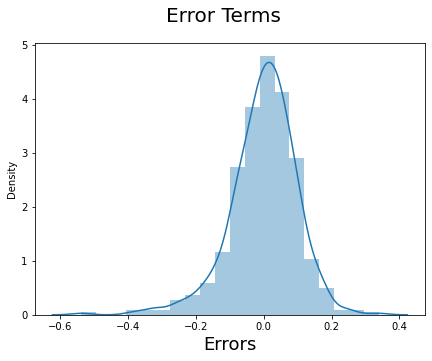

In [237]:
res = y_train - y_train_pred

# Plot the histogram

fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        
plt.xlabel('Errors', fontsize = 18)
plt.show()

###### Finding: - From the histogram, we could conclude that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

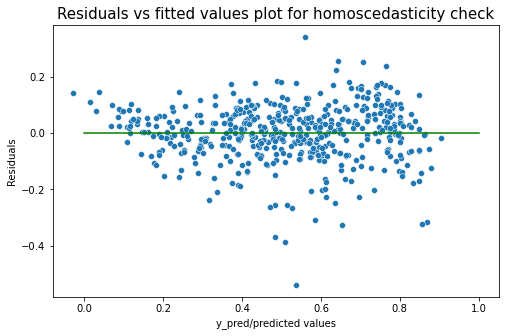

In [238]:
## Check for Homoscedasticity
plt.figure(figsize = [8,5])
p = sns.scatterplot(y_train_pred,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,1],[0,0],color='green')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check', fontsize = 15)

##### INSIGHT: - From the above plot, We can coclude that data points are closer to best fit line so it is linear. we can see that residuals have almost equal variance across the regression line.

# There is No Multicollinearity between the predictor variables:

In [239]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) 
for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.35
1,windspeed,3.08
7,weathersit_Good/Clear,2.55
4,yr_1,2.00
2,season_summer,1.55
3,season_winter,1.33
5,mnth_9,1.20
6,holiday_1,1.04


##### Finding : Every VIF value is less than 5 (VIF< 5 ) that is achieved so that there no multicollinearity between predictor variables.

# MAKING PREDICTION USING FINAL MODEL
   <b> Applying the scaling on the test sets

In [240]:
# Apply scaler() to all numeric variables in test dataset. 
Bike_1_test[num_vars] = scaler.transform(Bike_1_test[num_vars])
Bike_1_test.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_2,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_Good/Clear,weathersit_Moderate/Misty
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
535,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,...,0,0,0,0,1,0,0,1,1,0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [241]:
Bike_1_test.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_2,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_Good/Clear,weathersit_Moderate/Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.481818,0.100000,...,0.036364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.640909,0.654545,0.318182
std,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.500809,0.300684,...,0.187620,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.480828,0.476601,0.466833
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [243]:
# Dividing test set into X_test and y_test sets:
y_test = Bike_1_test.pop('cnt')
X_test = Bike_1_test
print(y_test.shape)
print(X_test.shape)

(220,)
(220, 29)


In [244]:
#Selecting the variables that which is part of final model (Model_7).
col_test = X_train_rfe7.columns

X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)

X_test_lm7.head()


,const,temp,windspeed,season_summer,season_winter,yr_1,mnth_9,holiday_1,weathersit_Good/Clear
184,1.0,0.831783,0.084219,0,0,0,0,1,0
535,1.0,0.901354,0.153728,1,0,1,0,0,1
299,1.0,0.511964,0.334206,0,1,0,0,0,0
221,1.0,0.881625,0.339570,0,0,0,0,0,1
152,1.0,0.817246,0.537414,1,0,0,0,0,1


In [246]:
y_test_pred = lr7.predict(X_test_lm7)

# Model Evaluation:

Text(0, 0.5, 'y_test_pred')

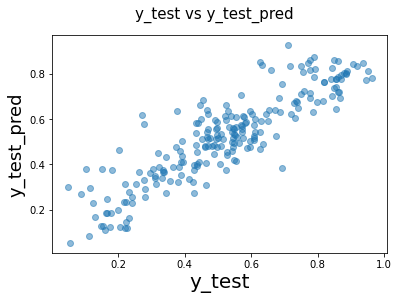

In [249]:
# Plot y_test and y_test_pred:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=0.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 15)              
plt.xlabel('y_test', fontsize = 20)                         
plt.ylabel('y_test_pred', fontsize = 18) 

###### From plot we can say that there is linear relationship between y_test and y_test_pred.

# Residual Analysis:
### R- squared value for Train and Test:

In [254]:
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 78.32
Train data r^2 : 80.84


### Adjusted R-squared value for Train and Test

In [255]:
n = X_test.shape[0]
n1 = X_train_rfe7.shape[0]
p = X_test.shape[1]
p1 = X_train_rfe7.shape[1]
#Adjusted R-squared using the formula
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)
print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 77.5
Train data adjusted r^2 : 80.53


# FINAL RESULT COMPARISON:
- Test data r^2 : 78.32

- Train data r^2 : 80.84

- Test data adjusted r^2 : 77.5

- Train data adjusted r^2 : 80.53

This seems to be a really good model that can very well 'Generalize' various datasets.

As per our final Model, the below predictor variables influences bike booking :

- temp (Temperature)
- mnth_9 (September Month)
- yr_1 (Year 2019)
- season_summer
- season_winter
- holiday_1 
- weathersit_Good/Clear( weather is good or clear)
- windspeed (Speed of the wind)